# Model Building

Loan_ID won't be used in the analysis.So, dropping the Loan_ID Column

In [415]:
train=train.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [416]:
test=test.drop('Loan_ID',axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


In [417]:
train=train.drop('Gender',axis=1)
test=test.drop('Gender',axis=1)

In [418]:
train=train.drop('Dependents',axis=1)
test=test.drop('Dependents',axis=1)

In [419]:
train=train.drop('Self_Employed',axis=1)
test=test.drop('Self_Employed',axis=1)

Also dropping the Loan_Status column and storing it in another variable.

In [420]:
x=train.drop('Loan_Status',axis=1)
x.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [421]:
y=train['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Creating Dummy Varible

In [422]:
x=pd.get_dummies(x) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [423]:
def stratified_cross_validation(model):
    
    """This function performs Stratified Shuffle Split. Accepts the model as an argument and returns stratified 
    randomized fold scores and model predictions"""
    
    counter=1 
    pred_scores=[]
    kf = StratifiedShuffleSplit(n_splits=4,random_state=1,test_size= 0.25) 
    for train_index,test_index in kf.split(X,y):
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y[train_index],y[test_index]
        model.fit(xtr, ytr)
        pred_test = model.predict(xvl)
        score = accuracy_score(yvl,pred_test)   
        counter+=1 
        pred=model.predict_proba(xvl)[:,1]
        pred_scores.append(score)
    return pred_scores, pred_test

In [424]:
def display_cf_matrix(y_cv,model_pred):
    
    """This function draws the confusion matrix. Accepts true values of the target and the predicted values of the target made by 
    the model as an argument"""
    
    cf_matrix = confusion_matrix(y_cv,model_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    labels = [f"{v1}: {v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [425]:
def accuracy_metrics(y_test,predictions):

  """This function prints the classification report of the model which includes Precion, Recall and F-1 Score"""

  report = classification_report(y_test, predictions)
  print(report)

# Baseline Model: Applying Logistic Regression

In [426]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y, train_size =0.75,random_state=0)

In [427]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [428]:
baseline_lr = model.predict(x_cv)

In [429]:
print("Accuracy of the Baseline Model is {}".format(round(accuracy_score(y_cv,baseline_lr)*100,2)), "%")

Accuracy of the Baseline Model is 83.77 %


In [430]:
accuracy_metrics(y_cv,baseline_lr)

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



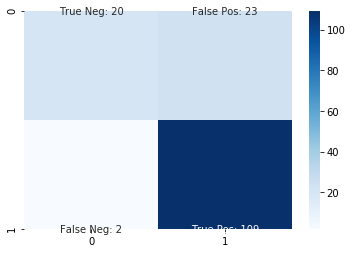

In [431]:
display_cf_matrix(y_cv,baseline_lr)

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We can come up with following new three features:

1. Total Income: As evident from Exploratory Data Analysis, we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.



In [432]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome'] 

In [433]:
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome'] 

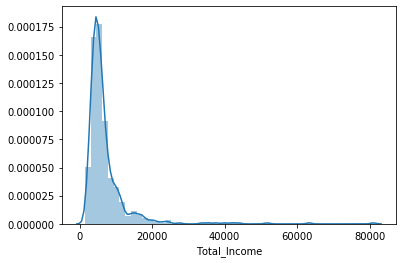

In [434]:
sns.distplot(train['Total_Income'])

In [435]:
train['Total_Income_log'] = np.log(train['Total_Income'])

In [436]:
test['Total_Income_log'] = np.log(test['Total_Income'])

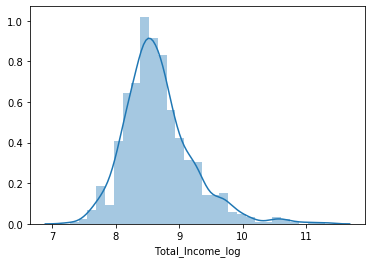

In [437]:
sns.distplot(train['Total_Income_log'])

2. EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate EMI by taking the ratio of loan amount with respect to loan amount term.

In [438]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term'] 

In [439]:
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term'] 

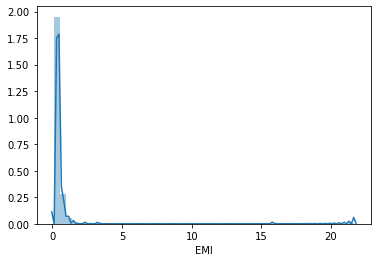

In [440]:
sns.distplot(test['EMI'])

3. Balance Income: This is the income left after the EMI has been paid. Idea behind creating this variable is that if the value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [441]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)

In [442]:
test['Balance_Income'] = test['Total_Income'] - (test['EMI'] * 1000)

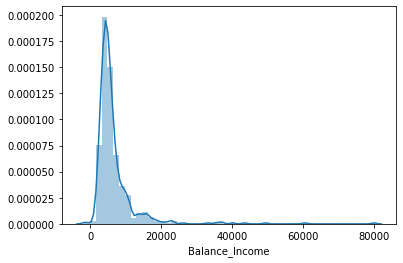

In [443]:
sns.distplot(train['Balance_Income'])

In [444]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [445]:
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building

In [446]:
X=train.drop('Loan_Status',axis=1)
X.head()

,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance_Income
0,1.0,4.852030,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,0,1,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,0,1,1,0,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,0,1,0,1,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [447]:
y = train.Loan_Status

# Logistic Regression Model

In [448]:
lr_model = LogisticRegression(random_state=1)

In [449]:
lr_model_score, lr_model_pred = stratified_cross_validation(lr_model)

In [450]:
print("\nMean of Accuracy Scores=",mean(lr_model_score))


Mean of Accuracy Scores= 0.8165584415584416


In [451]:
print(classification_report(y_cv,lr_model_pred))

              precision    recall  f1-score   support

           0       0.29      0.14      0.19        43
           1       0.72      0.86      0.79       111

    accuracy                           0.66       154
   macro avg       0.50      0.50      0.49       154
weighted avg       0.60      0.66      0.62       154



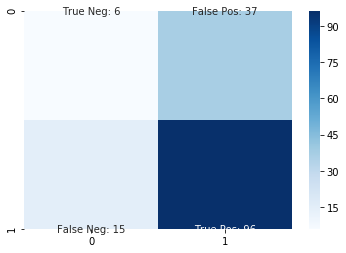

In [452]:
display_cf_matrix(y_cv,lr_model_pred)

# Decision Tree Model

In [453]:
dt_model = tree.DecisionTreeClassifier(random_state=1)

In [454]:
dt_model_score, dt_model_pred = stratified_cross_validation(dt_model)

In [455]:
print("\nMean of Accuracy Scores=",mean(dt_model_score))


Mean of Accuracy Scores= 0.6964285714285714


In [456]:
print(classification_report(y_cv,dt_model_pred))

              precision    recall  f1-score   support

           0       0.23      0.28      0.25        43
           1       0.70      0.64      0.67       111

    accuracy                           0.54       154
   macro avg       0.46      0.46      0.46       154
weighted avg       0.57      0.54      0.55       154



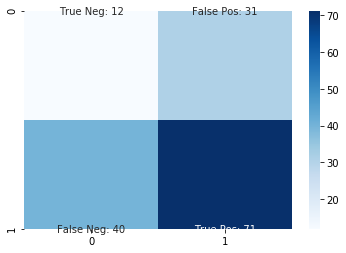

In [457]:
display_cf_matrix(y_cv,dt_model_pred)

# Random Forest Model

In [458]:
rf_model = RandomForestClassifier(random_state=1, max_depth=10)

In [459]:
rf_model_score, rf_model_pred = stratified_cross_validation(rf_model)

In [460]:
print("\nMean of Accuracy Scores=",mean(rf_model_score))


Mean of Accuracy Scores= 0.7727272727272727


In [461]:
print(classification_report(y_cv,rf_model_pred))

              precision    recall  f1-score   support

           0       0.28      0.21      0.24        43
           1       0.72      0.79      0.76       111

    accuracy                           0.63       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.60      0.63      0.61       154



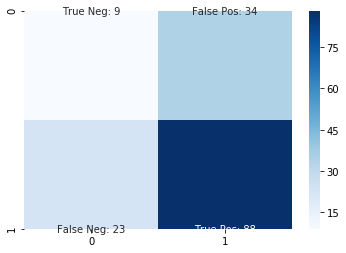

In [462]:
display_cf_matrix(y_cv,rf_model_pred)

# Hyper-Parameter Tuning

In [463]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20)) }

In [464]:
grid_search= GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [465]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, train_size =0.75,random_state=1)

In [466]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

Estimating the optimized value

In [467]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

# Tuned Random Forest Model

In [493]:
hyper_rf_model =  RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)

In [494]:
hyper_rf_model_score, hyper_rf_model_pred = stratified_cross_validation(hyper_rf_model)

In [495]:
print("\nMean of Accuracy Scores=",mean(hyper_rf_model_score))


Mean of Accuracy Scores= 0.8116883116883117


In [496]:
print(classification_report(y_cv,hyper_rf_model_pred))

              precision    recall  f1-score   support

           0       0.24      0.12      0.16        49
           1       0.67      0.82      0.74       105

    accuracy                           0.60       154
   macro avg       0.45      0.47      0.45       154
weighted avg       0.53      0.60      0.55       154



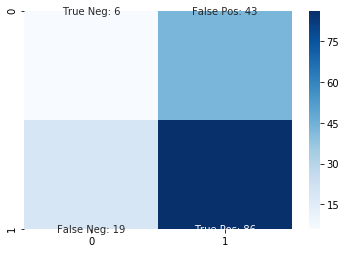

In [497]:
display_cf_matrix(y_cv,hyper_rf_model_pred)

# Feature Importance

In [498]:
importances= pd.Series(hyper_rf_model.feature_importances_, index = X.columns).sort_values()

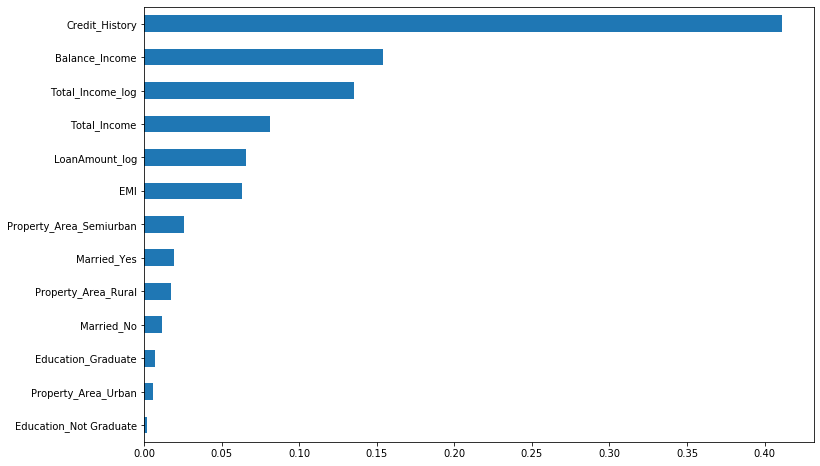

In [499]:
importances.plot(kind='barh', figsize=(12,8))

# XGBoost

In [500]:
xgb_model = XGBClassifier(random_state=1, max_depth=4, n_estimators=50)

In [501]:
xgb_model_score, xgb_model_pred = stratified_cross_validation(xgb_model)

In [502]:
print("\nMean of Accuracy Scores=",mean(xgb_model_score))


Mean of Accuracy Scores= 0.775974025974026


In [503]:
print(classification_report(y_cv,xgb_model_pred))

              precision    recall  f1-score   support

           0       0.39      0.33      0.36        49
           1       0.71      0.76      0.73       105

    accuracy                           0.62       154
   macro avg       0.55      0.54      0.54       154
weighted avg       0.61      0.62      0.61       154



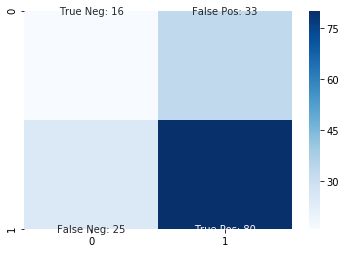

In [504]:
display_cf_matrix(y_cv,xgb_model_pred)